## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#데이터 로드

df1 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='euc_kr')
df2 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')
df3 = pd.read_csv('./data/자동차리콜현황(2021).csv', encoding='euc_kr')


In [4]:
# 데이터 병합

df = pd.concat([df1, df2, df3])
df


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1957,비엠더블유코리아(주),730Ld xDrive,2015-06-22,2019-02-21,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1958,비엠더블유코리아(주),730d xDrive,2019-02-14,2020-06-26,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1959,비엠더블유코리아(주),730d xDrive,2015-07-01,2019-02-11,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1960,비엠더블유코리아(주),630d xDrive,2017-06-28,2020-06-22,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성


In [5]:
# 데이터 중복 여부 및 개수 확인

df.isnull().sum()


제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [6]:
# 데이터 중복 처리(삭제)

df[df.duplicated(keep=False)]



,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
111,비엠더블유코리아(주),X4 xDrive20d xLine,2018-06-15,2019-03-22,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
112,비엠더블유코리아(주),X3 xDrive20d M Sport Package,2017-09-04,2019-03-23,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
113,비엠더블유코리아(주),520d xDrive,2016-05-23,2018-06-14,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
114,비엠더블유코리아(주),520d xDrive,2015-11-10,2015-11-10,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
115,비엠더블유코리아(주),520d xDrive,2014-06-13,2016-10-27,2022-02-16,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
...,...,...,...,...,...,...
1957,비엠더블유코리아(주),730Ld xDrive,2015-06-22,2019-02-21,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1958,비엠더블유코리아(주),730d xDrive,2019-02-14,2020-06-26,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1959,비엠더블유코리아(주),730d xDrive,2015-07-01,2019-02-11,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1960,비엠더블유코리아(주),630d xDrive,2017-06-28,2020-06-22,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성


In [7]:
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 4656
After: 4498


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [17]:
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [18]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count') # 내림차순 정렬
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [19]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = './NanumGothic.ttf' # 폰트 위치
# plt.rc('font', family=font_name)

plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

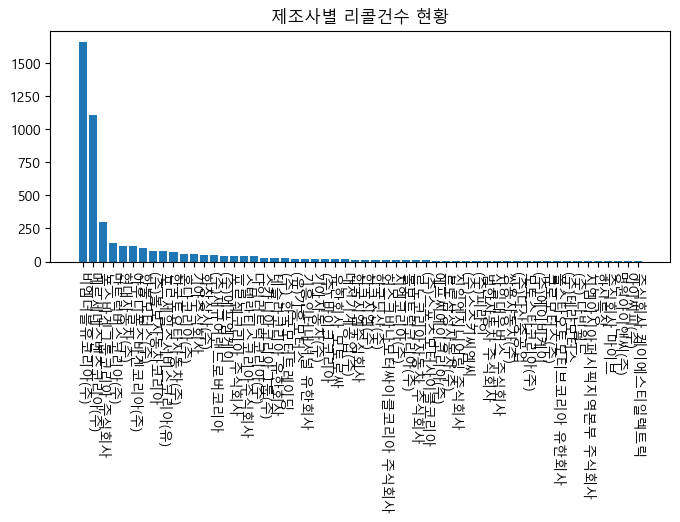

In [20]:
x = tmp.index
y = tmp['count']

plt.figure(figsize=(8,3))   # 스케치북 그리고
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)    # x축 이름 회전
plt.title('제조사별 리콜건수 현황') # 차트 제목 쓰고
plt.show()                  # 출력하라

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)

df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
df['사용기간'] = df['리콜개시일'] - df['생산기간(부터)']
df[['사용기간']]


C:\Users\82108\AppData\Local\Temp\ipykernel_11220\3819200688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
C:\Users\82108\AppData\Local\Temp\ipykernel_11220\3819200688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])
C:\Users\82108\AppData\Local\Temp\ipykernel_11220\3819200688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,사용기간
0,249 days
1,2606 days
2,2618 days
3,3964 days
4,2574 days
...,...
1808,677 days
1809,677 days
1810,3219 days
1811,2497 days


In [31]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1812
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   제작자       4498 non-null   object         
 1   차명        4498 non-null   object         
 2   생산기간(부터)  4498 non-null   datetime64[ns] 
 3   생산기간(까지)  4498 non-null   object         
 4   리콜개시일     4498 non-null   datetime64[ns] 
 5   리콜사유      4498 non-null   object         
 6   사용기간      4498 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 281.1+ KB


In [38]:
tmp = df.groupby('사용기간').size().sort_values
tmp

<bound method Series.sort_values of 사용기간
5 days       1
17 days      1
19 days      1
23 days      1
30 days      2
            ..
8457 days    1
8556 days    1
8743 days    1
8750 days    1
8826 days    1
Length: 2506, dtype: int64>

In [39]:
# 리콜 횟수

tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count')
tmp

,count
차명,
BMW 320d,82
TGS,75
BMW 520d,70
BMW 420d,41
TGX,38
...,...
HARLEY-DAVIDSON FLHTK,1
HARLEY-DAVIDSON FLHTKSE,1
HARLEY-DAVIDSON FLHTP,1


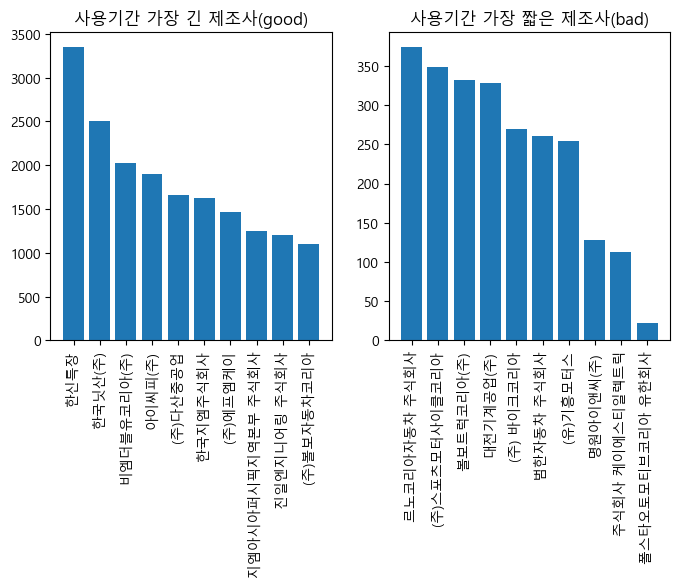

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐




```
문제:그나마 튼튼 제조사 top 3는?
답: 제조사 한신득장, 한국닛산(주), 비엠더블유코리아(주) 가 사용기간이 가장 긴 제조사이기는 하나, 비엠더블유코리아 같은 경우에는 리콜이 가장 많이 된 제조사이기도 하다.
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [11]:
# 리콜건수가 가장 많은 제조사는? BMW 320d
tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count')

In [12]:
tmp['count'].max()

82

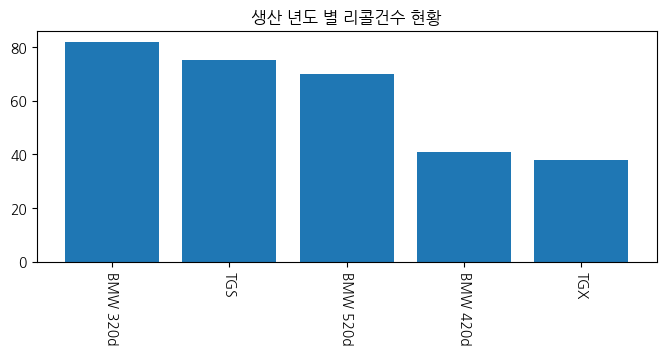

In [14]:
tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count').head(5)
x = tmp.index
y = tmp['count']

plt.figure(figsize=(8,3))   #스케치북 그리고
plt.bar(x=x,height=y)       #bar 차트에 x, y 값 할당
plt.xticks(rotation=270,ticks=tmp.index)    #x축 이름 회전
plt.title('생산 년도 별 리콜건수 현황') # 차트 제목 쓰고
plt.show()   

In [8]:
# 리콜 사유는?

df['리콜사유']

0       제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
2       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
3       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
4       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
                              ...                        
1808    특정 기간 동안 생산된 일부 차량이 공회전 속도 근방에서 작동될 때 엔진제어유닛 소...
1809    특정 기간 동안 생산된 일부 차량이 공회전 속도 근방에서 작동될 때 엔진제어유닛 소...
1810    제조공정에서 연료공급 차단 밸브의 코일에 발생한 스크래치로 밸브의 작동이 불가능하여...
1811    차량 지속 운행시 시동 꺼짐 및 화재 발생 가능성 있을 수 있음 ※ 미국 비충돌화재...
1812    휠 내측에 제작자명, 휠의 윤곽에 대한 호칭, 휠 인셋 또는 아웃셋, 제조일 또는 ...
Name: 리콜사유, Length: 4498, dtype: object

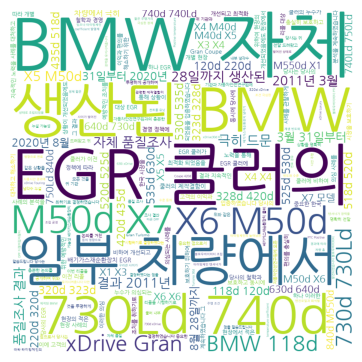

In [83]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = result['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [17]:
# 주요 원인이 포함된 이유 상세 보기
a_df = df.loc[df['리콜사유'].str.contains('EGR')]

In [22]:
a_df['리콜사유'].max()

'현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되는 사례가 발견되었습니다'

In [23]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?
a_df['차명'].head(3)

10     Tiguan 2.0 TDI BMT
11         Tiguan 2.0 TDI
831               짚그랜드체로키
Name: 차명, dtype: object

In [24]:
a_df['차명'].head(1)

10    Tiguan 2.0 TDI BMT
Name: 차명, dtype: object

In [28]:
tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count')
tmp

,count
차명,
BMW 320d,82
TGS,75
BMW 520d,70
BMW 420d,41
TGX,38
...,...
HARLEY-DAVIDSON FLHTK,1
HARLEY-DAVIDSON FLHTKSE,1
HARLEY-DAVIDSON FLHTP,1


```
리콜 주요 원인은? 

: 현장에서 매우 적은 수이기는 하나 B47D-1 엔진의 EGR 쿨러에서 누수가 의심되는 사례가 발견되었습니다

그래서, 가장 나쁜 모델은? 

: 리콜의 주요 원인은 Tiguan 2.0 TDI BMT 차량의 EGR 쿨러 누수가 가장 높으나 리콜의 횟수는 BMW 320d가 가장 높습니다. 리콜의 횟수가 가장 높은 BMW사의 320d 시리즈가 가장 나쁜 모델이라 판단됩니다.

```